In [2]:
import pandas as pd
import numpy as np
from dfply import *
import matplotlib.pyplot as plt
import datetime

In [3]:
df1 = pd.read_csv('C:/Users/QI/Desktop/2022summer/Intern/Guzman Energy/May2022_homework-main/data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv')
df2 = pd.read_csv('C:/Users/QI/Desktop/2022summer/Intern/Guzman Energy/May2022_homework-main/data/Assignment 2 - new.app4.csv')

In [4]:
df1['Date/Time'].unique()

array([' 01/01  01:00:00', ' 01/01  02:00:00', ' 01/01  03:00:00', ...,
       ' 12/31  22:00:00', ' 12/31  23:00:00', ' 12/31  24:00:00'],
      dtype=object)

In [5]:
df2['time'].unique()

array(['6/7/2013 11:04', '6/7/2013 11:05', '6/7/2013 11:06', ...,
       '9/17/2013 23:08', '9/17/2013 23:09', '9/17/2013 23:10'],
      dtype=object)

In [6]:
df11 = df1.copy()
df22 = df2.copy()

In [7]:
df11['Time'] = df11['Date/Time'].str.replace('24:00:00', '00:00:00')
df11['Time'] = pd.to_datetime(df11['Time'], format = ' %m/%d  %H:%M:%S')
df11['Month'] = df11['Time'].dt.month
df11['Day'] = df11['Time'].dt.day
df11['Hour'] = df11['Time'].dt.hour
print(df11[['Time', 'Month', 'Day', 'Hour']].iloc[[0, df11.shape[0]-1],:])#The limitation of df1

                    Time  Month  Day  Hour
0    1900-01-01 01:00:00      1    1     1
8759 1900-12-31 00:00:00     12   31     0


In [8]:
df22['Time'] = pd.to_datetime(df22['time'])
df22['Month'] = df22['Time'].dt.month
df22['Day'] = df22['Time'].dt.day
df22['Hour'] = df22['Time'].dt.hour
print(df22[['Time', 'Month', 'Day', 'Hour']].iloc[[0, df22.shape[0]-1],:])#The limitation of df2
Year = df22['Time'].dt.year[0]

                     Time  Month  Day  Hour
0     2013-06-07 11:04:00      6    7    11
10845 2013-09-17 23:10:00      9   17    23


In [9]:
df2_sum = (df22 >> 
           select(X.W_min, X.Month, X.Day, X.Hour) >> 
           group_by(X.Month, X.Day, X.Hour)>>
           summarize(electricity = X.W_min.sum()/1000))
print(df2_sum)

     Hour  Day  Month  electricity
0      11    7      6    57.388943
1      12    7      6    27.227961
2      13    7      6   111.476298
3      14    7      6   109.021960
4      15    7      6     5.773963
5      16    7      6     1.619193
6      17    7      6    12.081027
7      18    7      6    25.478736
8      19    7      6    11.360621
9      20    7      6     1.054541
10     10    8      6    54.240433
11     11    8      6   105.125872
12     12    8      6    24.332633
13     13    8      6    90.371892
14     10    9      6    36.106900
15     11    9      6   108.994766
16     12    9      6    90.980250
17     10   10      6    38.057175
18     11   10      6   114.513788
19     12   10      6   109.916904
20     13   10      6    86.743821
21     12   11      6    86.163386
22     13   11      6    54.312595
23     11   12      6    38.665766
24     12   12      6   107.845807
25     13   12      6    93.619473
26     10   13      6    34.767732
27     11   13      

### The overlap period is between June 7th, 11am to September 17th, 11pm.

In [10]:
df = pd.merge(df11, df2_sum, on = ['Month', 'Day', 'Hour'])
df.drop(['Date/Time'],axis = 1, inplace = True)
df['total'] = np.sum(df.drop(['Time', 'Month', 'Day', 'Hour'], axis = 1), axis = 1)
for i in range(df.shape[0]):
    df.loc[i,'Time'] = df.loc[i,'Time'].replace(year = Year)

Text(0.5, 1.0, 'Hourly Consumption of Electricity')

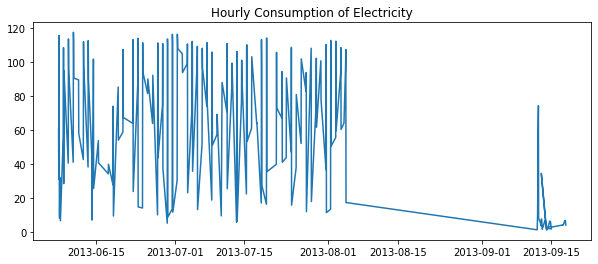

In [14]:
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(df['Time'], df['total'])
ax.set_title('Hourly Consumption of Electricity')

Text(0.5, 1.0, 'Weekday Consumption of Electricity')

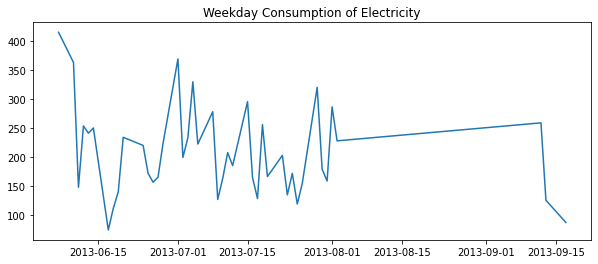

In [18]:
df_weekday = (df>>
              select(X.Time, X.Month, X.Day, X.Hour, X.total))
df_weekday['weekday'] = df_weekday['Time'].dt.weekday
df_weekday = (df_weekday>>
              filter_by(X.weekday< 5)>>
              group_by(X.Month, X.Day)>>
              summarize(weekday_total = X.total.sum()))
df_weekday['Date'] = 0
for i in range(df_weekday.shape[0]):
    df_weekday.loc[i, 'Date'] = datetime.datetime(Year, df_weekday.loc[i, 'Month'], df_weekday.loc[i, 'Day'])
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(df_weekday['Date'], df_weekday['weekday_total'])
ax.set_title('Weekday Consumption of Electricity')

Text(0.5, 1.0, 'Monthly Consumption of Electricity')

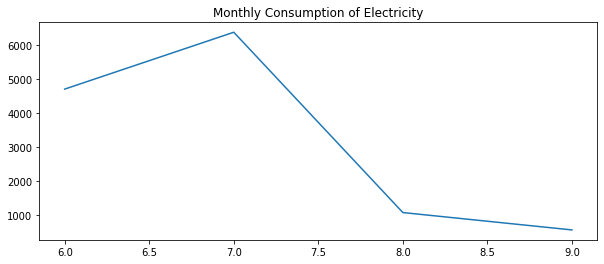

In [19]:
df_month = (df >> 
           select(X.Month, X.Day, X.Hour, X.total) >> 
           group_by(X.Month)>>
           summarize(month_total = X.total.sum()))
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(df_month['Month'], df_month['month_total'])
ax.set_title('Monthly Consumption of Electricity')